In [1]:
# !pip install opencv-python

!pip install opencv-python

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import matplotlib.image as img
import cv2
%matplotlib inline

In [11]:
# creating bias using multipliation 

# a = 0.2*np.random.uniform()
# print(a)

In [12]:
# Increasing color value of the image

def brightness(imageNamefilePath):
    imageData = cv2.cvtColor(imageNamefilePath, cv2.COLOR_RGB2HSV) # breaking RGB to HSV
    Randombright = 0.5*np.random.uniform()
    imageData[:, :, 2] = imageData[:, :, 2]* Randombright # we change the color value of imageData
    imageData = cv2.cvtColor(imageData, cv2.COLOR_HSV2RGB) # after changing the value we convert it HSV to RGB
    return imageData

In [13]:
#for i in range(11):
#  angel = np.random.unifrom(30) - 30/2
#  print(angel)'''

In [14]:
# 5+  10 * np.random.uniform() - 10/2

In [15]:
def imageTransformation(imageNamefilePath, angel_range_change, shear_range_change, translation_range):
    
    # Image Angel Rotation Calculation - has a center point
    angel_rotation = np.random.uniform(angel_range_change) - angel_range_change / 2
    image_height, image_width, color_ch = imageNamefilePath.shape
    image_metrixCalculation = cv2.getRotationMatrix2D((image-width/2, image-height/2), angel_rotation, 1)
    
    
    # Image Translation - positional change korsi but metadata copy na kore 'Metadatar Positional Change' kora
    axisX = translation_range* np.random.uniform() - translation_range/2
    axisY = translation_range* np.random.uniform() - translation_range/2 # calc pattern same but random er jonno value differnt hobe
    TranslationConcatenate = np.float32([[1, 0, axisX], [0, 1, axisY]]) # 3 channels - concatenate means merging with 2 values
    
    # Image Shear Range Calculation - no center point - no 0
    shear_range_changeValue = np.float32([[5, 5], [20, 5], [5, 20]]) 
    # floating points are turned into left or right side
    axisPoint1 = 5 + shear_range_change * np.random.uniform() - shear_range_change/2
    axisPoint2 = 20 + shear_range_change * np.random.uniform() - shear_range_change/2
    
    # after turning those points we update by Points - we had 3 combinations therfore
    Points = np.float32([[axisPoint1, 5], [axisPoint2, axisPoint1], [5, axisPoint2]])
    # affineTransform means 'Parallel Changing' against original value
    shearRangeConcatenate = cv2.getAffineTransform(axisPoint1, axisPoint2)
    
    image = cv2.warpAffine(imageNamefilePath, image_metrixCalculation, (image_width, image_height)) # unpacking
    image = cv2.warpAffine(image, TranslationConcatenate, (image_width, image_height))  
    image = cv2.warpAffine(image, shearRangeConcatenate, (image_width, image_height))
    
    image = brightness(image)
    return image
    

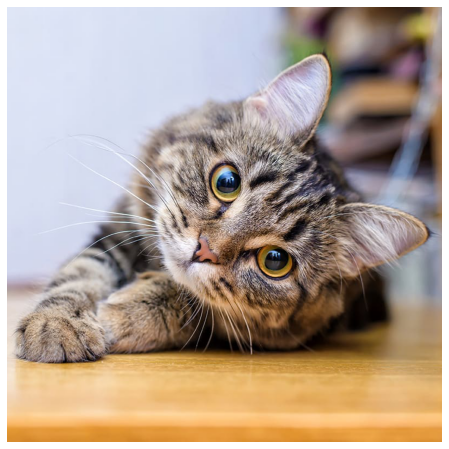

In [16]:
plt.figure(figsize=(10, 8))
imagefilePath = img.imread("../class_5/ImageAugmentation/image-31454-800.jpeg")
plt.imshow(imagefilePath)
plt.axis('off')
plt.show()

In [17]:

gridValue1 = grid.GridSpec(10, 10)
gridValue1.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize=(6,4))

for i in range(100):
    ax1 = plt.subplot(gridValue1(i)) # subplot: multiple var in one axis; subplots: matiple img in maltiple axis
    ax1.setxticklabels([])
    ax1.setyticklabels([])
    ax1.set_aspect('equal') # ratio
    image = imageTransformation(imagefilePath, 20, 10, 5) # angel_range, shear_raneg, translation_range
    
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    
   # .save("../class_5/ImageAugmentation/image-31454-800.jpeg"+i+"png")
    
plt.show()
    
    

TypeError: 'GridSpec' object is not callable

<Figure size 432x288 with 0 Axes>